# Graph visualization

In [1]:
import networkx as nx
import pickle
import matplotlib.pyplot as plt

In [2]:
graph = pickle.load(open('graph.pickle', 'rb'))

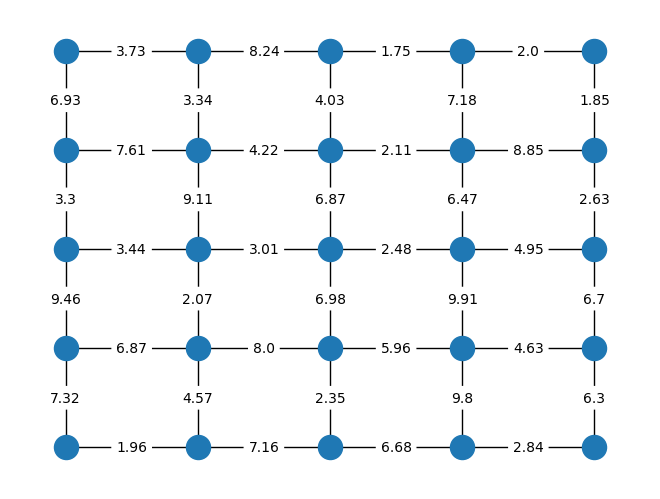

In [4]:
labels = nx.get_edge_attributes(graph, 'weight first stage')
for i,k in labels.items():
    labels[i] = round(k, 2)
pos1 = [(x,y) for x in range(5) for y in range(5)]
pos2 = {n: pos1[i] for i, n in enumerate(graph.nodes())}

nx.draw(graph, pos2)
nx.draw_networkx_edge_labels(graph, pos2, edge_labels=labels, rotate=False);
# plt.savefig("figures/instance.pdf")

# Analysis

In [2]:
import pandas as pd
import seaborn as sns
import ast
import tikzplotlib
import numpy as np

I double checked and verfied that the results are the same as the previous run.

In [3]:
S = [2, 3, 4]
T = [3, 4, 5]
K = [1, 2, 3]
models = ["BaDo", "AdDo", "BaSp", "AdSp", "BaRo", "AdRo"]

df = pd.DataFrame()

for s in S:
    for t in T:
        for k in K:
            df_instance = pd.read_csv(f"ExperimentV2/S{s}T{t}K{k}/result.txt", sep=';')
            df = pd.concat([df, df_instance], axis=0)
            
df.columns = [x.replace(" ", "") for x in df.columns]
df.reset_index(inplace=True)
df.head()

,index,CompilationTimeBaDo,RunTimeBaDo,CompilationTimeAdDo,RunTimeAdDo,CompilationTimeBaRo,RunTimeBaRo,CompilationTimeAdRo,RunTimeAdRo,CompilationTimeBaSp,...,BaRoSolution,BaSpSolution,AdDoSolution,AdRoSolution,AdSpSolution,Run,DoInSpFirstStage,RoInSpFirstStage,DoInRoFirstStage,SpInRoFirstStage
0,0,0.014051,0.017652,0.026698,0.048953,0.037139,0.097711,0.080355,0.056215,0.036921,...,"{1: {(0, 5): 0, (0, 1): 0, (1, 6): 0, (1, 2):...","{1: {(0, 5): 0, (0, 1): 0, (1, 6): 0, (1, 2):...","{1: {(0, 5): 0, (0, 1): 0, (1, 6): 0, (1, 2):...","{1: {(0, 5): 0, (0, 1): 0, (1, 6): 0, (1, 2):...","{1: {(0, 5): 0, (0, 1): 0, (1, 6): 0, (1, 2):...",1,13.774635,33.209289,13.774635,13.774635
1,1,0.010796,0.086872,0.025361,0.026296,0.072499,0.335043,0.080028,0.459612,0.036754,...,"{1: {(0, 5): 0, (0, 1): 0, (1, 6): 0, (1, 2):...","{1: {(0, 5): 0, (0, 1): 0, (1, 6): 0, (1, 2):...","{1: {(0, 5): 0, (0, 1): 0, (1, 6): 0, (1, 2):...","{1: {(0, 5): 0, (0, 1): 0, (1, 6): 0, (1, 2):...","{1: {(0, 5): 0, (0, 1): 0, (1, 6): 0, (1, 2):...",2,33.731043,47.258952,33.731043,43.915331
2,2,0.010930,0.010560,0.025028,0.023505,0.036365,0.069723,0.117123,0.071404,0.036548,...,"{1: {(0, 5): 1, (0, 1): 0, (1, 6): 0, (1, 2):...","{1: {(0, 5): 0, (0, 1): 0, (1, 6): 0, (1, 2):...","{1: {(0, 5): 0, (0, 1): 0, (1, 6): 0, (1, 2):...","{1: {(0, 5): 1, (0, 1): 0, (1, 6): 0, (1, 2):...","{1: {(0, 5): 0, (0, 1): 0, (1, 6): 0, (1, 2):...",3,10.908514,22.945667,10.908514,10.908514
3,3,0.011203,0.066612,0.025404,0.025011,0.036150,0.382201,0.079921,0.260589,0.036830,...,"{1: {(0, 5): 0, (0, 1): 0, (1, 6): 0, (1, 2):...","{1: {(0, 5): 0, (0, 1): 0, (1, 6): 0, (1, 2):...","{1: {(0, 5): 0, (0, 1): 0, (1, 6): 0, (1, 2):...","{1: {(0, 5): 0, (0, 1): 0, (1, 6): 0, (1, 2):...","{1: {(0, 5): 0, (0, 1): 0, (1, 6): 0, (1, 2):...",4,26.148642,44.652151,26.148642,29.875467
4,4,0.010711,0.013845,0.024812,0.024215,0.036694,0.095245,0.078697,0.064138,0.036954,...,"{1: {(0, 5): 0, (0, 1): 0, (1, 6): 0, (1, 2):...","{1: {(0, 5): 0, (0, 1): 0, (1, 6): 0, (1, 2):...","{1: {(0, 5): 0, (0, 1): 0, (1, 6): 0, (1, 2):...","{1: {(0, 5): 0, (0, 1): 0, (1, 6): 0, (1, 2):...","{1: {(0, 5): 0, (0, 1): 0, (1, 6): 0, (1, 2):...",5,15.421954,38.406580,15.421954,15.421954


In [4]:
df.shape

(2700, 51)

In [9]:
df.columns

Index(['index', 'CompilationTimeBaDo', 'RunTimeBaDo', 'CompilationTimeAdDo',
       'RunTimeAdDo', 'CompilationTimeBaRo', 'RunTimeBaRo',
       'CompilationTimeAdRo', 'RunTimeAdRo', 'CompilationTimeBaSp',
       'RunTimeBaSp', 'CompilationTimeAdSp', 'RunTimeAdSp', 'VariablesBaDo',
       'ConstraintsBaDo', 'VariablesAdDo', 'ConstraintsAdDo', 'VariablesBaRo',
       'ConstraintsBaRo', 'VariablesAdRo', 'ConstraintsAdRo', 'VariablesBaSp',
       'ConstraintsBaSp', 'VariablesAdSp', 'ConstraintsAdSp',
       'NumberOfScenarios', 'NumberOfTerminals', 'NumberOfTerminalGroups',
       'BaDoObjective', 'BaRoObjective', 'BaSpObjective', 'BaSpFirstStage',
       'AdDoObjective', 'AdRoObjective', 'AdSpObjective', 'AdSpFirstStage',
       'DoInRo', 'SpInRo', 'DoInSp', 'RoInSp', 'BaDoSolution', 'BaRoSolution',
       'BaSpSolution', 'AdDoSolution', 'AdRoSolution', 'AdSpSolution', 'Run',
       'DoInSpFirstStage', 'RoInSpFirstStage', 'DoInRoFirstStage',
       'SpInRoFirstStage'],
      dtype='object

In [12]:
DOcolor = "red"
SPcolor = "orange"
ROcolor = "blue"

## Sanity checks
Check if undirected and directed formulations give the same objective values.

In [5]:
max(df["BaDoObjective"] - df["AdDoObjective"])

0.0

In [6]:
max(df["BaRoObjective"] - df["AdRoObjective"])

5.200199773014447e-06

In [7]:
max(df["BaSpObjective"] - df["AdSpObjective"])

2.5442636371053595e-06

## 1. Undirected vs Directed
**Conclusie**: directed doet het goed als de instantie meer terminals bevat.

Figuur 1: Hoe meer terminals, hoe sterker de verbetering van de directed formulation t.o.v. de undirected formulation. Een soortgelijk verband zien we niet terug bij de andere twee figuren.

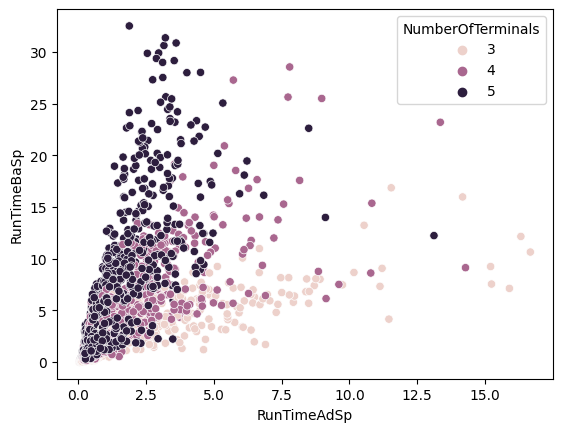

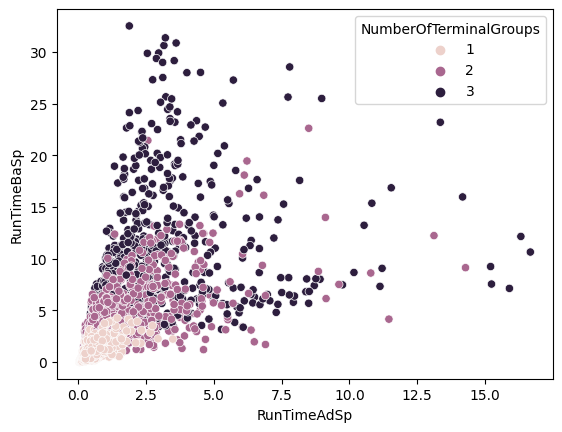

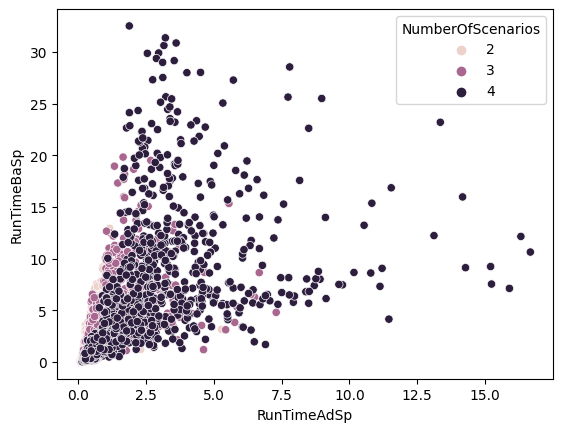

In [12]:
sns.scatterplot(data=df, x="RunTimeAdSp", y="RunTimeBaSp", hue="NumberOfTerminals");
plt.show();
sns.scatterplot(data=df, x="RunTimeAdSp", y="RunTimeBaSp", hue="NumberOfTerminalGroups");
plt.show();
sns.scatterplot(data=df, x="RunTimeAdSp", y="RunTimeBaSp", hue="NumberOfScenarios");
plt.show();

Wellicht zien we het effect beter in een geaggregeerde plot. Hier hebben we het totaal aantal terminals op de x-as gezet. Conclusie: hoe moeilijker het probleem, hoe beter de relatieve prestatie van directed t.o.v. undirected.

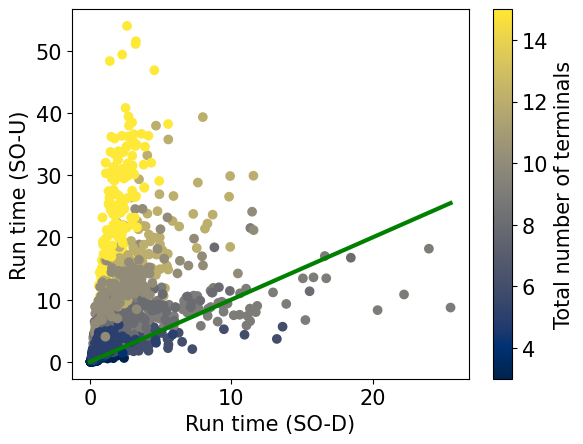

In [18]:
df["Total number of terminals"] = df["NumberOfTerminals"] * df["NumberOfTerminalGroups"]
# sns.scatterplot(data=df, x="RunTimeAdSp", y="RunTimeBaSp", hue="Total number of terminals");
plt.scatter(x=df["RunTimeAdSp"], y=df["RunTimeBaSp"], c=df["Total number of terminals"], cmap='cividis')
plt.xlabel("Run time (SO-D)")
plt.ylabel("Run time (SO-U)")
plt.colorbar(label="Total number of terminals")

# Plot line y=x
x = np.linspace(0, max(df["RunTimeAdSp"]), 100)
y = x
plt.plot(x, y, label='Equal run time', linewidth=3, color="green");

# tikzplotlib.clean_figure();
# tikzplotlib.save("figures/scatter.tex")
plt.rcParams.update({'font.size': 20});
plt.savefig("figures/scatter.pdf")
# plt.show();

## 2. Best and worst cases

**Worst case**: many terminals and terminal groups, ver uit elkaar.

In [14]:
temp_df = df.sort_values(by='RunTimeBaSp', ascending=False).head(n=3).copy()
temp_df.head()

,index,CompilationTimeBaDo,RunTimeBaDo,CompilationTimeAdDo,RunTimeAdDo,CompilationTimeBaRo,RunTimeBaRo,CompilationTimeAdRo,RunTimeAdRo,CompilationTimeBaSp,...,DoInSp,RoInSp,BaDoSolution,BaRoSolution,BaSpSolution,AdDoSolution,AdRoSolution,AdSpSolution,Run,Total number of terminals
2622,22,0.065913,1.991545,0.212187,0.226085,0.448379,31.076354,5.049742,2.139750,0.449455,...,96.215568,87.105928,"{1: {(0, 5): 1.0, (0, 1): -0.0, (1, 6): 1.0, ...","{1: {(0, 5): 1.0, (0, 1): 0.0, (1, 6): 1.0, (...","{1: {(0, 5): 1.0, (0, 1): 0.0, (1, 6): 1.0, (...","{1: {(0, 5): 1.0, (0, 1): 0.0, (1, 6): 1.0, (...","{1: {(0, 5): 1.0, (0, 1): 0.0, (1, 6): 1.0, (...","{1: {(0, 5): 1.0, (0, 1): 0.0, (1, 6): 1.0, (...",23,15
2647,47,0.065597,2.345031,0.209957,0.205503,0.451646,50.909501,5.585644,3.986810,0.455423,...,91.101514,86.538846,"{1: {(0, 5): 1.0, (0, 1): 0.0, (1, 6): 1.0, (...","{1: {(0, 5): 1.0, (0, 1): -0.0, (1, 6): 1.0, ...","{1: {(0, 5): 1.0, (0, 1): -0.0, (1, 6): 1.0, ...","{1: {(0, 5): 1.0, (0, 1): 0.0, (1, 6): 1.0, (...","{1: {(0, 5): 1.0, (0, 1): 0.0, (1, 6): 1.0, (...","{1: {(0, 5): 1.0, (0, 1): 0.0, (1, 6): 1.0, (...",48,15
2659,59,0.065018,1.608701,0.212281,0.153147,0.454259,45.165085,5.538705,3.812717,0.453428,...,90.506162,87.105928,"{1: {(0, 5): -0.0, (0, 1): -0.0, (1, 6): -0.0...","{1: {(0, 5): 1.0, (0, 1): -0.0, (1, 6): 1.0, ...","{1: {(0, 5): 1.0, (0, 1): 0.0, (1, 6): 1.0, (...","{1: {(0, 5): -0.0, (0, 1): -0.0, (1, 6): -0.0...","{1: {(0, 5): 1.0, (0, 1): 0.0, (1, 6): 1.0, (...","{1: {(0, 5): 1.0, (0, 1): 0.0, (1, 6): 1.0, (...",60,15


In [15]:
print(temp_df["RunTimeBaSp"])
print(temp_df["NumberOfScenarios"])
print(temp_df["NumberOfTerminals"])
print(temp_df["NumberOfTerminalGroups"])
print(temp_df["Run"])

2622    32.527139
2647    31.375144
2659    30.876472
Name: RunTimeBaSp, dtype: float64
2622    4
2647    4
2659    4
Name: NumberOfScenarios, dtype: int64
2622    5
2647    5
2659    5
Name: NumberOfTerminals, dtype: int64
2622    3
2647    3
2659    3
Name: NumberOfTerminalGroups, dtype: int64
2622    23
2647    48
2659    60
Name: Run, dtype: int64


**Best case**: few terminals and terminal groups. Dicht bij elkaar.

In [16]:
temp_df = df.sort_values(by='RunTimeBaSp', ascending=True).head(n=3).copy()
temp_df.head()

,index,CompilationTimeBaDo,RunTimeBaDo,CompilationTimeAdDo,RunTimeAdDo,CompilationTimeBaRo,RunTimeBaRo,CompilationTimeAdRo,RunTimeAdRo,CompilationTimeBaSp,...,DoInSp,RoInSp,BaDoSolution,BaRoSolution,BaSpSolution,AdDoSolution,AdRoSolution,AdSpSolution,Run,Total number of terminals
82,82,0.013179,0.009728,0.027761,0.022333,0.038530,0.018223,0.147557,0.047816,0.039324,...,19.783515,19.783515,"{1: {(0, 5): 1.0, (0, 1): -0.0, (1, 6): -0.0,...","{1: {(0, 5): 1.0, (0, 1): -0.0, (1, 6): -0.0,...","{1: {(0, 5): 1.0, (0, 1): -0.0, (1, 6): -0.0,...","{1: {(0, 5): 1.0, (0, 1): -0.0, (1, 6): -0.0,...","{1: {(0, 5): 1.0, (0, 1): -0.0, (1, 6): -0.0,...","{1: {(0, 5): 1.0, (0, 1): -0.0, (1, 6): -0.0,...",83,3
66,66,0.013322,0.010920,0.027741,0.023462,0.039071,0.020004,0.111589,0.048718,0.039268,...,31.034099,31.034099,"{1: {(0, 5): -0.0, (0, 1): -0.0, (1, 6): -0.0...","{1: {(0, 5): -0.0, (0, 1): -0.0, (1, 6): -0.0...","{1: {(0, 5): -0.0, (0, 1): -0.0, (1, 6): -0.0...","{1: {(0, 5): -0.0, (0, 1): -0.0, (1, 6): -0.0...","{1: {(0, 5): -0.0, (0, 1): -0.0, (1, 6): -0.0...","{1: {(0, 5): -0.0, (0, 1): -0.0, (1, 6): -0.0...",67,3
20,20,0.013241,0.023309,0.027722,0.035578,0.039055,0.023090,0.110818,0.060084,0.039681,...,24.247920,24.247920,"{1: {(0, 5): -0.0, (0, 1): -0.0, (1, 6): -0.0...","{1: {(0, 5): 0.0, (0, 1): -0.0, (1, 6): -0.0,...","{1: {(0, 5): -0.0, (0, 1): -0.0, (1, 6): -0.0...","{1: {(0, 5): -0.0, (0, 1): -0.0, (1, 6): -0.0...","{1: {(0, 5): -0.0, (0, 1): -0.0, (1, 6): -0.0...","{1: {(0, 5): -0.0, (0, 1): -0.0, (1, 6): -0.0...",21,3


In [17]:
print(temp_df["RunTimeBaSp"])
print(temp_df["NumberOfScenarios"])
print(temp_df["NumberOfTerminals"])
print(temp_df["NumberOfTerminalGroups"])
print(temp_df["Run"])

82    0.017721
66    0.019609
20    0.021268
Name: RunTimeBaSp, dtype: float64
82    2
66    2
20    2
Name: NumberOfScenarios, dtype: int64
82    3
66    3
20    3
Name: NumberOfTerminals, dtype: int64
82    1
66    1
20    1
Name: NumberOfTerminalGroups, dtype: int64
82    83
66    67
20    21
Name: Run, dtype: int64


Heeft de plaatsing van de nodes daar nog enige invloed op? Kennelijk wel!

<Axes: >

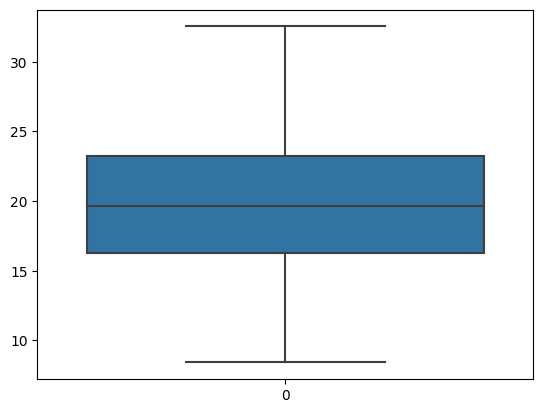

In [18]:
temp_df = df[(df["NumberOfScenarios"]==4) & (df["NumberOfTerminals"]==5) & (df["NumberOfTerminalGroups"]==3)].sort_values(by='RunTimeBaSp', ascending=False).copy()
sns.boxplot([temp_df["RunTimeBaSp"]])

In [103]:
def print_scenarios(instance_df, scenarios, name=""):
    colors = ["brown", "beige", "pink"]
    for s in range(1,scenarios+1):
        terminal_groups = instance_df[instance_df["Scenario"] == s]["Terminal Group"]
        terminals = [item for sublist in terminal_groups for item in sublist]
        colors_terminals = {}
        for v in terminals:
            for i, g in enumerate(terminal_groups):
                if v in g:
                    colors_terminals[v] = colors[i]
        color_map = []
        for v in graph.nodes():
            if v in terminals:
                color = colors_terminals[v]
            else:
                color = "gray"
            color_map.append(color)
        nx.draw(graph, pos2, node_color=color_map)
        plt.savefig(f"figures/{name}{s}.pdf")


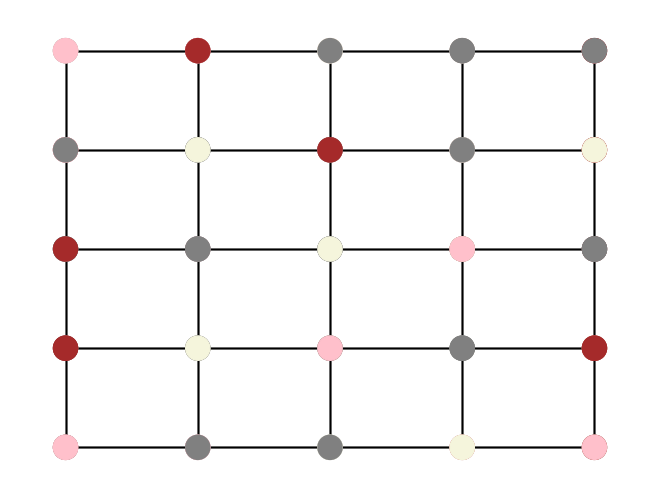

In [104]:
instance_df = pd.read_csv(f"Experiment/S4T5K3/Instance23.csv")
instance_df["Terminal Group"] = instance_df["Terminal Group"].apply(ast.literal_eval)
instance_df["Type Pipe"] = instance_df["Type Pipe"].apply(ast.literal_eval)
print_scenarios(instance_df, max(instance_df["Scenario"]), name="worstcase")

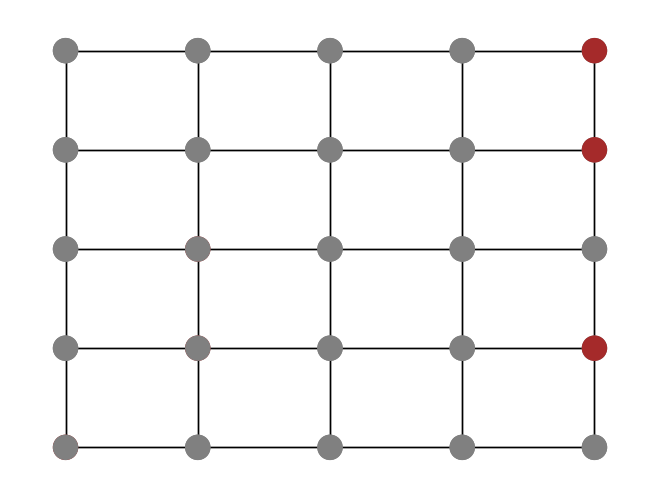

In [105]:
instance_df = pd.read_csv(f"Experiment/S2T3K1/Instance83.csv")
instance_df["Terminal Group"] = instance_df["Terminal Group"].apply(ast.literal_eval)
instance_df["Type Pipe"] = instance_df["Type Pipe"].apply(ast.literal_eval)
print_scenarios(instance_df, max(instance_df["Scenario"]), name="bestcase")

## 3. Comparison DO, SP, and RO

**Conclusion**: de verdeling is right-skewed, wat betekent dat RO relatief betaalbaar is t.o.v. DO.

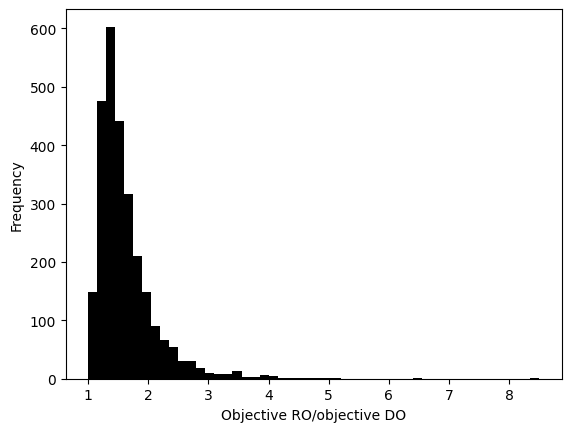

In [36]:
ratio = df["AdRoObjective"] / df["AdDoObjective"]

# Create a histogram using Matplotlib
plt.hist(ratio, bins=50, color='black')
plt.xlabel('Objective RO/objective DO')
plt.ylabel('Frequency')

tikzplotlib.save("figures/ROvsDOhist.tex")


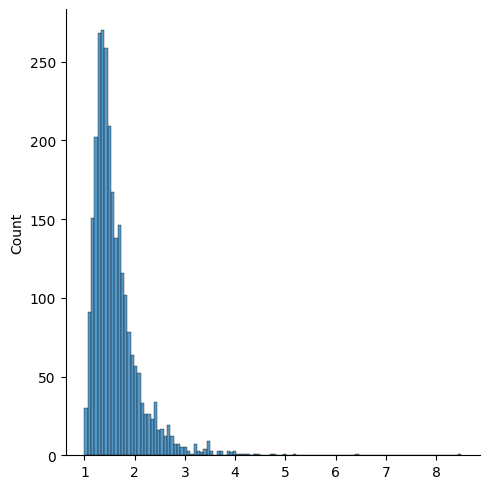

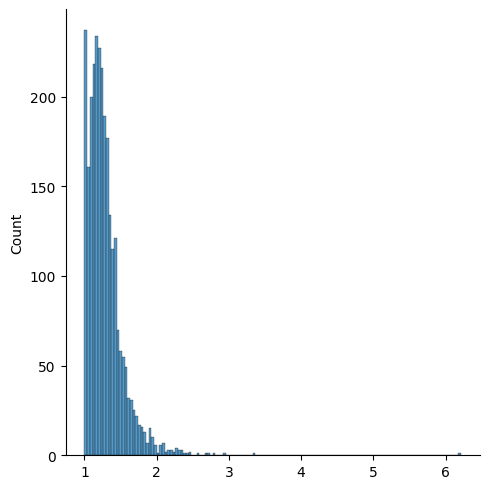

In [23]:
sns.displot(df["AdRoObjective"]/df["AdDoObjective"])
sns.displot(df["AdSpFirstStage"]/df["AdDoObjective"])

Afweging first en second stage costs. DO en SP geven allebei ongeveer even veel uit in de first stage, maar DO heeft aanzienlijk hogere second stage costs. 

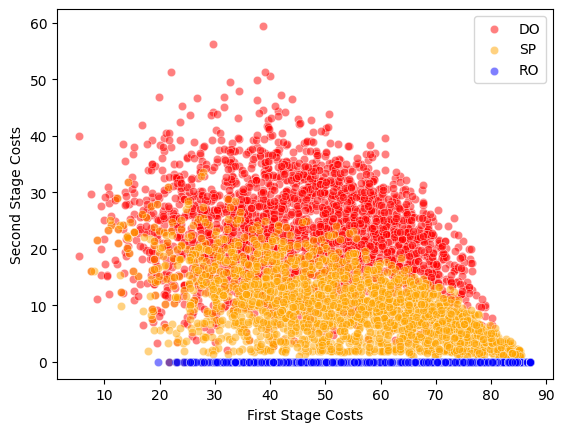

In [24]:
sns.scatterplot(x=df["AdDoObjective"], y=df["DoInSp"]-df["AdDoObjective"], label="DO", alpha=0.5, color=DOcolor);
sns.scatterplot(x=df["AdSpFirstStage"], y=df["AdSpObjective"]-df["AdSpFirstStage"], label="SP", alpha=0.5, color=SPcolor);
sns.scatterplot(x=df["AdRoObjective"], y=0, label="RO", alpha=0.5, color=ROcolor);
plt.xlabel("First Stage Costs");
plt.ylabel("Second Stage Costs");

In [11]:
(df["RoInSp"]-df["AdRoObjective"]).min()

-11.424507326895721

In [32]:
df.shape

(2600, 52)

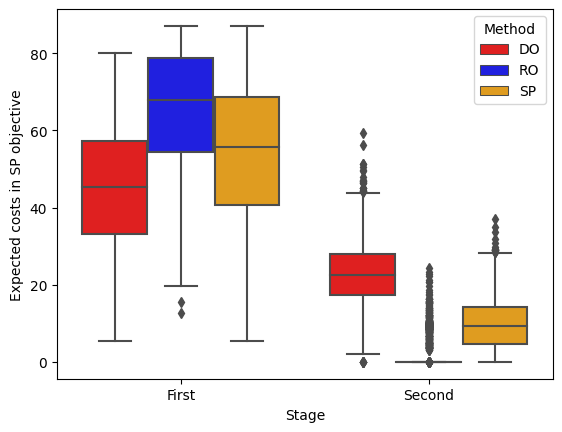

In [37]:
temp_df1 = pd.concat([df["DoInSpFirstStage"], df["RoInSpFirstStage"], df["AdSpFirstStage"]], axis=0).to_frame()
temp_df1["Method"] = ["DO"] * len(df) + ["RO"] * len(df) + ["SP"] * len(df)
temp_df1["Stage"] = "First"

temp_df2 = pd.concat([df["DoInSp"]-df["DoInSpFirstStage"], df["RoInSp"]-df["RoInSpFirstStage"], df["AdSpObjective"]-df["AdSpFirstStage"]], axis=0).to_frame()
temp_df2["Method"] = ["DO"] * len(df) + ["RO"] * len(df) + ["SP"] * len(df)
temp_df2["Stage"] = "Second"

temp_df = pd.concat([temp_df1, temp_df2], axis=0)
temp_df.columns = ["Value", "Method", "Stage"]

sns.boxplot(data=temp_df, x="Stage", y="Value", hue="Method", palette={"DO": DOcolor, "RO": ROcolor, "SP": SPcolor});
plt.ylabel("Expected costs in SP objective");

# plt.legend([],[], frameon=False);

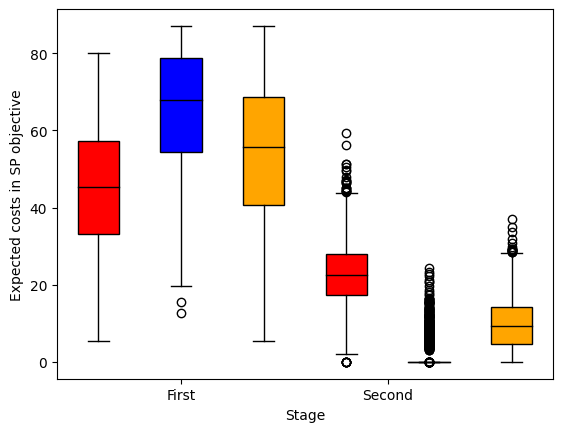

In [38]:
counter = 0
plots = []
colors = {"DO": DOcolor, "SP": SPcolor, "RO": ROcolor}
for stage in temp_df["Stage"].unique():
    for method in temp_df["Method"].unique():
        data = temp_df[(temp_df["Stage"] == stage) & (temp_df["Method"] == method)]["Value"]
        if len(data) > 0:
            ax = plt.boxplot(x=data,
                       positions=np.array(np.arange(1))+counter, widths=0.5, patch_artist=True,
                       boxprops=dict(facecolor=colors[method], color="black"),
                        medianprops=dict(color="black"))
            plots.append(ax)
            counter += 1
            
def define_box_properties(plot_name, color_code, label):
#     for k, v in plot_name.items():
#     plt.setp(plot_name["boxes"], facecolor=color_code)
         
    # use plot function to draw a small line to name the legend.
    plt.plot([], c=color_code, label=label)
 
 
# setting colors for each groups
define_box_properties(plots[0], DOcolor, 'DO')
define_box_properties(plots[1], ROcolor, 'RO')
define_box_properties(plots[2], SPcolor, 'SP')
define_box_properties(plots[3], DOcolor, 'DO')
define_box_properties(plots[4], SPcolor, 'SP')
 
# set the x label values
plt.xticks([1, 3.5], ["First", "Second"])
plt.ylabel("Expected costs in SP objective");
plt.xlabel("Stage")

tikzplotlib.save("figures/SPboxplot.tex")


Voorbeeld waarbij de DO weinig kost in de first stage, maar duur is in de second stage. Wanneer alles dicht bij elkaar staat (en ook nog eens aan de randen) per terminal group in de eerste stage, wordt het heel duur in de second stage voor DO.

In [28]:
temp_df = df.copy()
temp_df["DoSecondStage"] = temp_df["DoInSp"]-temp_df["AdDoObjective"]
temp_df.iloc[temp_df["DoSecondStage"].idxmax()]

index                                                                       26
CompilationTimeBaDo                                                   0.035995
RunTimeBaDo                                                           0.043698
CompilationTimeAdDo                                                   0.129287
RunTimeAdDo                                                           0.090881
CompilationTimeBaRo                                                   0.240661
RunTimeBaRo                                                          15.383492
CompilationTimeAdRo                                                   3.341747
RunTimeAdRo                                                           21.54134
CompilationTimeBaSp                                                   0.237354
RunTimeBaSp                                                          15.981069
CompilationTimeAdSp                                                   3.142062
RunTimeAdSp                                         

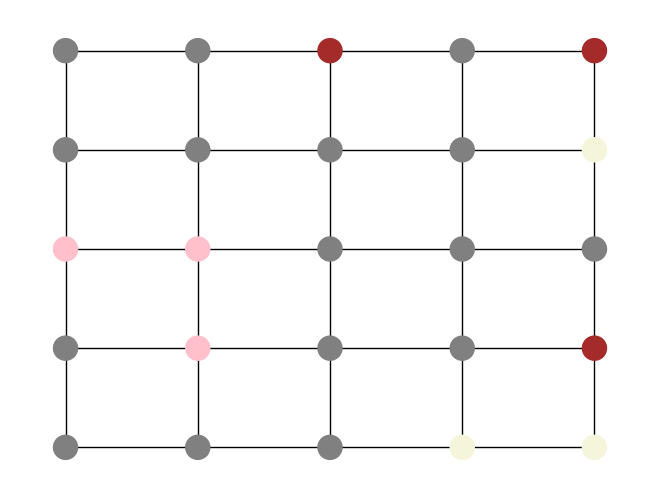

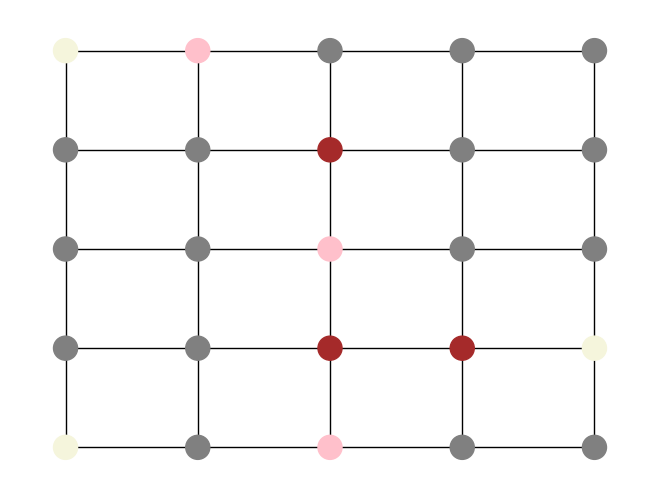

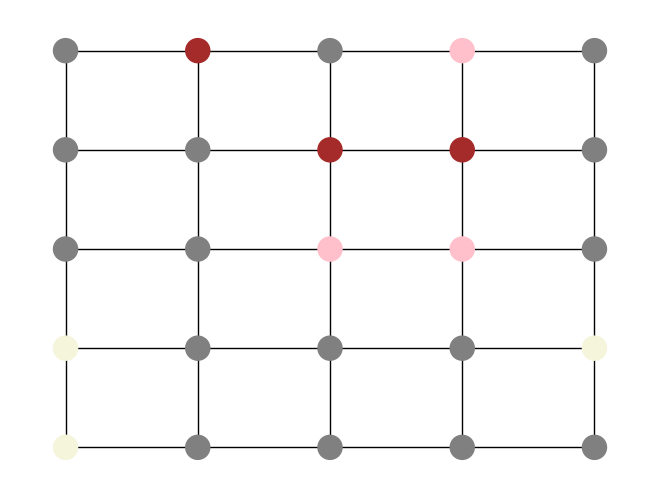

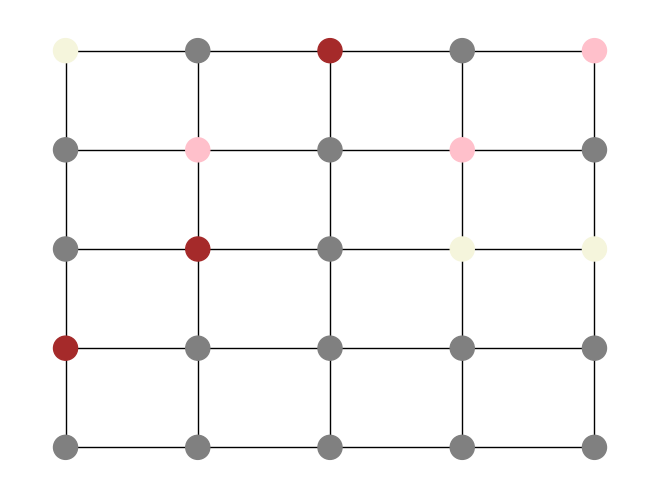

In [29]:
instance_df = pd.read_csv(f"Experiment/S4T3K3/Instance24.csv")
instance_df["Terminal Group"] = instance_df["Terminal Group"].apply(ast.literal_eval)
instance_df["Type Pipe"] = instance_df["Type Pipe"].apply(ast.literal_eval)
print_scenarios(instance_df, max(instance_df["Scenario"]))

## 4. Alessandro's comparison DO, RO and SP
**Conclusion**: RO doet het relatief slecht in het SP domein omdat het te conservatief is, SP benadert RO bij het RO-domein.

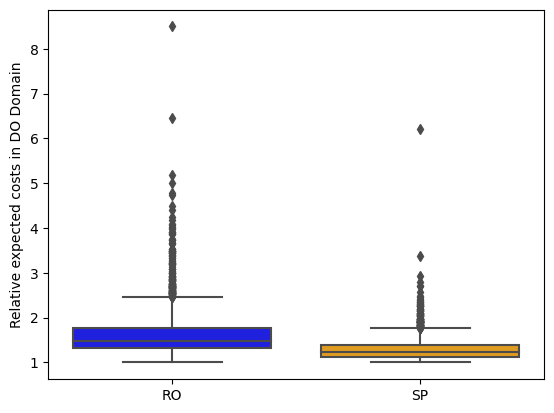

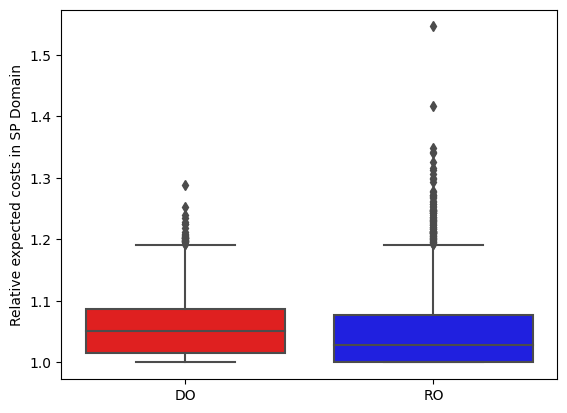

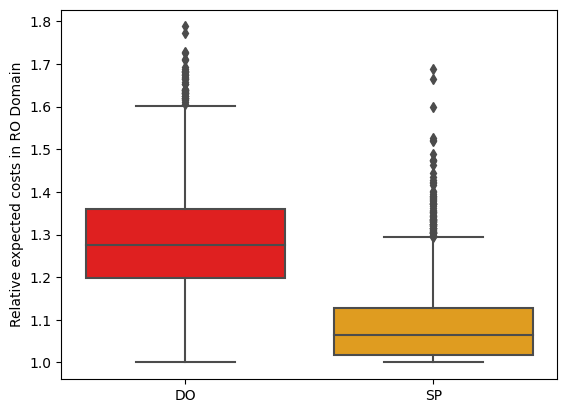

In [30]:
sns.boxplot([df["AdRoObjective"]/df["AdDoObjective"], df["AdSpFirstStage"]/df["AdDoObjective"]], palette=[ROcolor, SPcolor])
plt.ylabel("Relative expected costs in DO Domain");
plt.xticks(ticks=plt.xticks()[0], labels=["RO", "SP"]);
plt.show();

sns.boxplot([df["DoInSp"]/df["AdSpObjective"], df["RoInSp"]/df["AdSpObjective"]], palette=[DOcolor, ROcolor])
plt.ylabel("Relative expected costs in SP Domain");
plt.xticks(ticks=plt.xticks()[0], labels=["DO", "RO"]);
plt.show();

sns.boxplot([df["DoInRo"]/df["AdRoObjective"], df["SpInRo"]/df["AdRoObjective"]], palette=[DOcolor, SPcolor])
plt.ylabel("Relative expected costs in RO Domain");
plt.xticks(ticks=plt.xticks()[0], labels=["DO", "SP"]);
plt.show();


**Conclusion**: RO en SP zijn erg duur als je alleen naar first stage kijkt. Maar als je ook naar de second stage kijkt, worden die laatste twee veel interessanter.

In [41]:
rounding = 3
comparison_df = pd.DataFrame({"Method": ["DO", "RO", "SP"], 
                              "DO domain": [1, 
                                            round((df["AdRoObjective"]/df["AdDoObjective"]).mean(), rounding), 
                                            round((df["AdSpFirstStage"]/df["AdDoObjective"]).mean(), rounding)], 
                              "RO domain": [round((df["DoInRo"]/df["AdRoObjective"]).mean(), rounding),
                                            1,
                                            round((df["SpInRo"]/df["AdRoObjective"]).mean(), rounding),], 
                              "SP domain": [round((df["DoInSp"]/df["AdSpObjective"]).mean(), rounding), 
                                            round((df["RoInSp"]/df["AdSpObjective"]).mean(), rounding), 1]})
comparison_df.set_index("Method", inplace=True)
comparison_df

,DO domain,RO domain,SP domain
Method,,,
DO,1.000,1.286,1.057
RO,1.623,1.000,1.048
SP,1.225,1.116,1.000


In [107]:
comparison_df.to_latex("figures/comparison.tex")

/var/folders/fw/zjz8sscn11z9hzvyq33zv4xh0000gn/T/ipykernel_2539/1553441907.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  comparison_df.to_latex("figures/comparison.tex")


## 5. Compilation Time vs Run Time

**Conclusion**: de compilation time gaat omhoog bij de directed formulations (vanwege de extra constraints en beslis variabelen), maar dat levert wel winst op over het geheel.

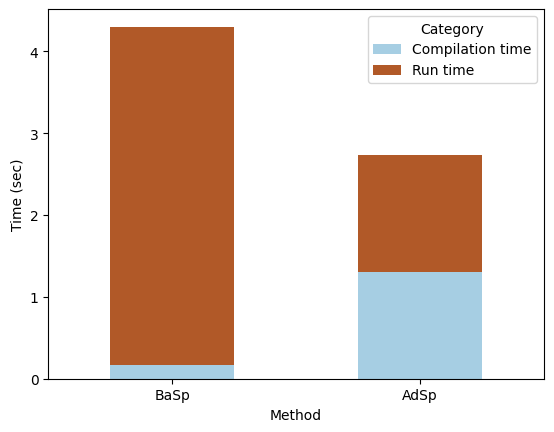

In [35]:
temp_df = pd.DataFrame({"Category": ["Compilation time", "Run time"], 
                        "BaSp": [df["CompilationTimeBaSp"].mean(), df["RunTimeBaSp"].mean()],
                       "AdSp": [df["CompilationTimeAdSp"].mean(), df["RunTimeAdSp"].mean()]}).T
new_header = temp_df.iloc[0] #grab the first row for the header
temp_df = temp_df[1:] #take the data less the header row
temp_df.columns = new_header
temp_df.plot.bar(stacked=True, colormap='Paired')
plt.ylabel("Time (sec)");
plt.xlabel("Method");
plt.xticks(rotation=0);

# sns.barplot(x='Category', y='Value', hue='Group', data=temp_df, palette="muted")

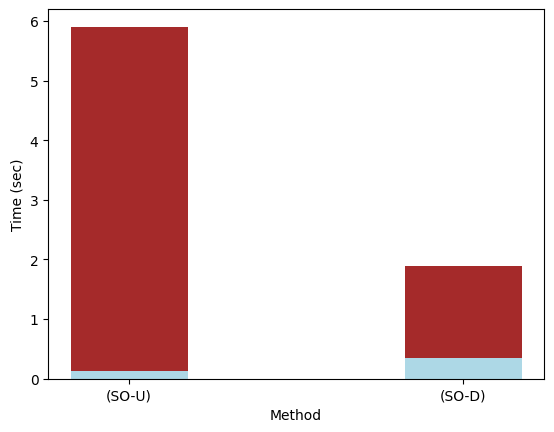

In [40]:
models = (
    "(SO-U)",
    "(SO-D)",
)
times = {
    "Compilation time": np.array([df["CompilationTimeBaSp"].mean(), df["CompilationTimeAdSp"].mean()]),
    "Run time": np.array([df["RunTimeBaSp"].mean(), df["RunTimeAdSp"].mean()]),
}
width = 0.35
colors = {"Compilation time": "lightblue", "Run time": "brown"}

fig, ax = plt.subplots()
bottom = np.zeros(2)

for label, time in times.items():
    p = ax.bar(models, time, width, label=label, bottom=bottom, color=colors[label])
    bottom += time

    
# plt.legend(loc="upper right")
plt.ylabel("Time (sec)");
plt.xlabel("Method");

tikzplotlib.save("figures/RunCompilation.tex")



## Zooi

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# fig = plt.figure(figsize=(6,6))
# ax = Axes3D(fig, auto_add_to_figure=False)
# fig.add_axes(ax)

sc = ax.scatter(df["NumberOfScenarios"], df["NumberOfTerminals"], df["NumberOfTerminalGroups"], c=df["RunTimeBaSp"], cmap=cmap)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)


In [ ]:
sns.scatterplot(data=df, x="VariablesAdSp", y="ConstraintsAdSp", hue="RunTimeAdSp")

In [ ]:
temp_df = df
temp_df["Total number of terminals"] = temp_df["NumberOfTerminals"] * temp_df["NumberOfTerminalGroups"]
temp_df["RatioTotalTime"] = temp_df["RunTimeBaSp"] / (temp_df["CompilationTimeBaSp"] + temp_df["RunTimeAdSp"])
sns.barplot(data=df, x="Total number of terminals", y="RatioTotalTime");
plt.show();

In [ ]:
temp_df = df
temp_df["Total number of terminals"] = temp_df["NumberOfTerminals"] * temp_df["NumberOfTerminalGroups"]
temp_df["RatioTotalTime"] = temp_df["RunTimeBaSp"] / (temp_df["CompilationTimeBaSp"] + temp_df["RunTimeAdSp"])
sns.scatterplot(data=df, hue="Total number of terminals", x="CompilationTimeBaSp", y="RunTimeBaSp");
plt.show();